# Tutorial 1: Intro to FDTD

This tutorial will walk you through setting up a simple dipole radiation simulation in Tidy3D.

For more details, refer to the [Tidy3d documentation](https://docs.simulation.cloud/projects/tidy3d/en/latest).

## Setup

First we import Tidy3D and the other packages needed.  If it is not installed, please perform the installation and account authentication by following the detailed instructions [here](https://docs.flexcompute.com/projects/tidy3d/en/stable/quickstart.html).


In [1]:
# imports
import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

Then, we will define the basic simulation parameters.  Note that the length scale is microns.

In [2]:
# simulation parameters
side_length = 9.0
grid_size = 50e-3

# apply a PML in all directions
boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML())

# spectrum and resolution parameters
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 50
run_time = 200 / freq0

Next, we define the objects present in our simulation, specifically the source and monitor.

In [3]:
# define dipole source at origin pointing in z
dipole_source = td.PointDipole(
    center=(0, 0, 0),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization='Ez',
    name='dipole',
)

In [4]:
# define monitor to measure fields in xz plane at central frequency
monitor = td.FieldMonitor(
    center=(0,0,0),
    size=(td.inf, 0, td.inf),
    freqs=[freq0],
    name='freq_domain',
)

And finally, we put everything together in a `Simulation` object, which contains all of the specs needed to run the simulation.

In [5]:
# define simulation
simulation = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=boundary_spec,
)

## Running Simulation

To run the simulation, we will call the `web.run()` function, passing our `Simulation` and some parameters about the task name and the path to download the data file.

In [6]:
# run simulation
sim_data = web.run(simulation, task_name='lecture01_dipole', path='data/data_dipole.hdf5')

[10:34:30] Created task 'lecture01_dipole' with task_id                         ]8;id=386133;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=542387;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#139\139]8;;\
           'fdve-01dcea2e-e7cf-44a4-b6f3-370055c3336ev1'.                                    

Output()

[10:34:31] status = queued                                                      ]8;id=905525;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=335881;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#269\269]8;;\

Output()

[10:34:34] status = preprocess                                                  ]8;id=756653;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=964595;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#263\263]8;;\

[10:34:38] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get  ]8;id=120735;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=456102;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#286\286]8;;\
           the billed FlexCredit cost after a simulation run.                                

           starting up solver                                                   ]8;id=694157;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=907764;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#290\290]8;;\

           running solver                                                       ]8;id=587484;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=373100;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#300\300]8;;\

Output()

[10:34:47] early shutoff detected, exiting.                                     ]8;id=675124;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=450103;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#313\313]8;;\

           status = postprocess                                                 ]8;id=184462;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=572816;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#330\330]8;;\

Output()

[10:34:50] status = success                                                     ]8;id=363516;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=518004;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#337\337]8;;\

Output()

[10:34:52] loading SimulationData from data/data_dipole.hdf5                    ]8;id=803030;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=658509;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#509\509]8;;\

## Post Run Analysis

After the job is done, all of the data is loaded into the `SimulationData` object called `sim_data` in this example.

From this, we can plot the results and make sure it looks reasonable.

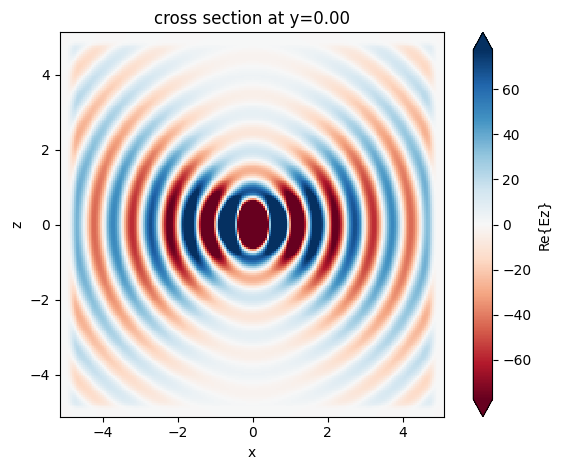

In [7]:
# check that frequency domain fields look good
ax = sim_data.plot_field('freq_domain', 'Ez', y=0, f=freq0)
plt.show()

## Adding Complexity

To make things more intereting, let's run the same simulation, but adding a few structures in the mix. For now, let's just add a few dielectric box objects to see how that changes the results.

In [8]:
# define the boxes
epsilon_box = 3
center_offset_box = 1.6
size_box = 1.8
medium=td.Medium(permittivity=epsilon_box,name='medium')

box_top = td.Structure(
    geometry=td.Box(
        center=(0, 0, center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box top',
)

bot_bot_r = td.Structure(
    geometry=td.Box(
        center=(+center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box bottom right',
)

bot_bot_l = td.Structure(
    geometry=td.Box(
        center=(-center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box bottom left',
)

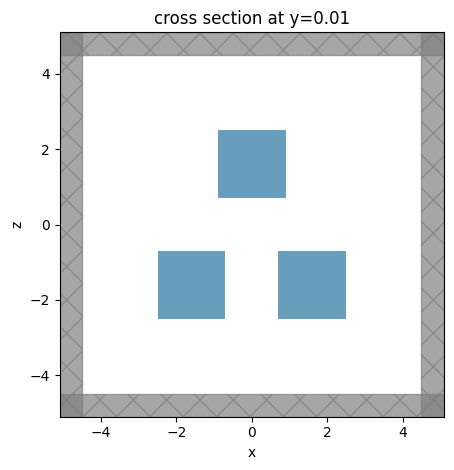

In [9]:
# make a new simulation with the boxes added
simulation_boxes = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[box_top, bot_bot_r, bot_bot_l],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=boundary_spec,
)

# visualize the simulation first, before running
ax = simulation_boxes.plot(y=0.01)
plt.show()

In [10]:
# run simulation
sim_data_boxes = web.run(simulation_boxes, task_name='lecture01_several_box', path='data/data_several_box.hdf5')

[10:34:52] Created task 'lecture01_several_box' with task_id                    ]8;id=481219;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=197817;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#139\139]8;;\
           'fdve-9b361ceb-84a1-41d5-964e-f81516139704v1'.                                    

Output()

[10:34:53] status = queued                                                      ]8;id=139040;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=799737;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#269\269]8;;\

Output()

[10:34:58] status = preprocess                                                  ]8;id=17924;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=570947;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#263\263]8;;\

[10:35:05] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get  ]8;id=547711;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=819662;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#286\286]8;;\
           the billed FlexCredit cost after a simulation run.                                

           starting up solver                                                   ]8;id=124751;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=484991;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#290\290]8;;\

           running solver                                                       ]8;id=285436;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=693844;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#300\300]8;;\

Output()

[10:35:18] early shutoff detected, exiting.                                     ]8;id=414534;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=830775;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#313\313]8;;\

           status = postprocess                                                 ]8;id=560560;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=359691;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#330\330]8;;\

Output()

[10:35:24] status = success                                                     ]8;id=532172;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=60411;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#337\337]8;;\

Output()

[10:35:25] loading SimulationData from data/data_several_box.hdf5               ]8;id=113347;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=223189;file:///home/weiliang/Documents/tidy3d-core/tidy3d_frontend/tidy3d/web/webapi.py#509\509]8;;\

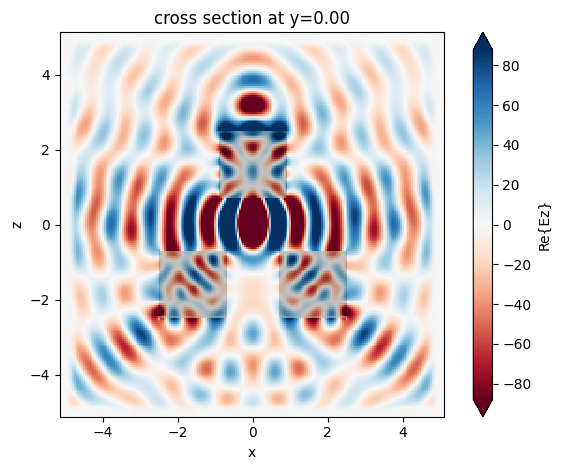

In [11]:
ax = sim_data_boxes.plot_field('freq_domain', 'Ez', y=0, f=freq0)
plt.show()